In [27]:
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
import seaborn as sns

# The 5% Rule-Sorta

Mortgage payment to rent is not a direct apples to apples comparison. 

The cost of buying vs. renting needs to be broken down into the **unrecoverable costs** for each, with an unrecoverable cost being the cost you pay with no associated residual value. 


The total unrecoverable cost of renting is simple:
1. **Rent**

The total unrecoverable cost of home ownership is more opaque, but falls into 3 categories:
1. **Property Tax** 
2. **Maitenance Cost** 
3. **Cost of capital (Cost of Debt + Cost of Equity)**


### Property Tax
1. NJ home owners pay the highest property taxes in the U.S. Almost double the national average. The average property tax rate is 2.42%

In [28]:
home_price = 1_100_000

tax_rate = .0242

In [29]:

property_tax_annual = - (home_price * tax_rate)

property_tax_monthly = property_tax_annual/12

print((f"Monthly Property Tax: ${property_tax_monthly:.3f}"))

Monthly Property Tax: $-2218.333


### Maitenance Cost
1. Will be assumed to be 1% of the purchase price. 

In [30]:
maitenance_cost_annual = - home_price * .01

maitenance_cost_monthly = maitenance_cost_annual/12

print((f"Monthly Maitenance: ${maitenance_cost_monthly:.3f}"))

Monthly Maitenance: $-916.667


### Cost of Capital

Broken Down into two categories: Cost of Debt, Cost of Equity.

#### Mortgage
To buy a home, you usually purchase with a down-payment in cash. This is Typically 20% of the value of the home, with the rest of the value being financed with a mortgage. 
- The down-payment is your **equity**
- The mortgage is your **debt**, and the mortgage interest cost is the **unrecoverable cost**
- Together your debt and equity make up 100% of the value of your home
$$ \text{Cost of Capital} = \text{Cost of Debt + Cost of Equity} $$

#### Cost of Debt
$\text{Cost of Debt}$ is the interest you pay on your mortgage.
- In 2022 annual mortgage rates in New Jersey for a 30-yr fixed with 200-300k downpayment  and a 780 credit rating are ~ 6%

In [31]:
# Mortgage Amount
mortgage = home_price * .80

# Mortgage Rate for 30 year fixed-rate 
mortgage_rate = .027

# Mortgage Length
years = 30

# monthly mortgage payment, ammortized over 30 year period
cost_of_debt_monthly = npf.pmt(mortgage_rate/12, 12*years, mortgage)
print((f"Cost of Debt Monthly: ${cost_of_debt_monthly:.3f}"))

Cost of Debt Monthly: $-3569.259


#### Cost of Equity
$ \text{Cost of Equity} $ is the Opportunity Cost incurred from using the 20% downpayment as a real estate investment rather than in the stock market. 

- The simplest way to compare stock and real estate is by examining the indexed performance of both markets. From March 1992 to March 2022, the U.S. housing average growth rate was 5.3%.

- The S&P 500 returned 9.65% annualized from the beginning of 1992 to the same period in 2022.

We are aggressive stock investors, so we'll use the historical S&P 500 return.

9.65% - 5.3% = 3.35% is the annualized Opportunity Cost of investing in real estate vs. the stock market


In [32]:

# down payment
down_payment = home_price * .20

# opportunity cost = 9.65% - 5.3% 
opportunity_cost = .0335

# cost of equity annual
cost_of_equity_annual = down_payment * - opportunity_cost

# cost of equity monthly
cost_of_equity_monthly = cost_of_equity_annual/12

# cost of capital
cost_of_capital_monthly = cost_of_equity_monthly + cost_of_debt_monthly

print((f"Cost of Debt Monthly: ${cost_of_debt_monthly:.3f}"))
print((f"Cost of Equity Monthly: ${cost_of_equity_monthly:.3f}"))
print((f"Cost of Capital Monthly: ${cost_of_capital_monthly:.3f}"))

Cost of Debt Monthly: $-3569.259
Cost of Equity Monthly: $-614.167
Cost of Capital Monthly: $-4183.426


### Putting it all Together

$$\text{Breakeven = Property Tax + Maitenance + Cost of Capital}$$

In [33]:
rent_breakeven = property_tax_monthly + maitenance_cost_monthly + cost_of_capital_monthly
rent_breakeven

print((f"Breakeven Monthly: ${rent_breakeven:.3f}"))

Breakeven Monthly: $-7318.426


<Axes: xlabel='Cost Type', ylabel='Monthly Amount'>

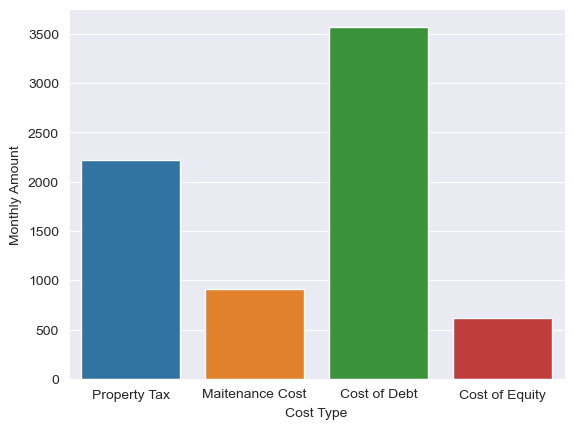

In [34]:
home_df = pd.DataFrame()
home_df['Cost Type'] = ['Property Tax', 'Maitenance Cost', 'Cost of Debt', 'Cost of Equity']
home_df['Monthly Amount'] = [property_tax_monthly, maitenance_cost_monthly, cost_of_debt_monthly, cost_of_equity_monthly]

# multiply by -1 to make positive and plot on graph
home_df['Monthly Amount'] = home_df['Monthly Amount'] * -1

# style = dark
sns.set_style('darkgrid')

# plot barplot
sns.barplot(x='Cost Type', y='Monthly Amount', data=home_df)
